## Goal: To build a random forest model using python

#### Import Libraries

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#matplotlib
import matplotlib 
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression

#### Set the working directory

In [2]:
os.chdir("C:\\insofe\\lab_assignments\\random_forest_python")
os.getcwd()

'C:\\insofe\\lab_assignments\\random_forest_python'

#### Load the data

In [3]:
train_data=pd.read_csv('SaratogaHouses.csv')

### Understand the data

In [17]:
train_data.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [18]:
train_data.tail()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [21]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
price              1728 non-null int64
lotSize            1728 non-null float64
age                1728 non-null int64
landValue          1728 non-null int64
livingArea         1728 non-null int64
pctCollege         1728 non-null int64
bedrooms           1728 non-null int64
fireplaces         1728 non-null int64
bathrooms          1728 non-null float64
rooms              1728 non-null int64
heating            1728 non-null object
fuel               1728 non-null object
sewer              1728 non-null object
waterfront         1728 non-null object
newConstruction    1728 non-null object
centralAir         1728 non-null object
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [22]:
train_data.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [24]:
train_data.shape

(1728, 16)

### Let us start with target variable exploration - 'price'. First let us do a scatter plot to see if there are any outliers in the data.

[  5000  10300  10300 ..., 760000 775000 775000]


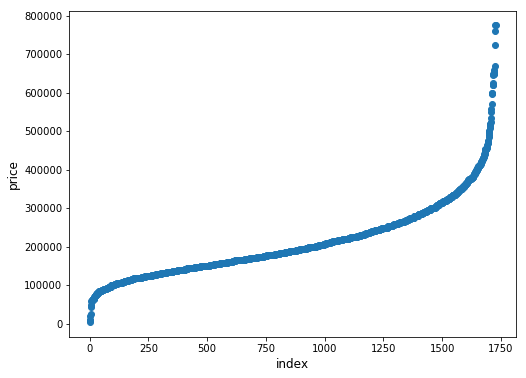

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_data.shape[0]), np.sort(train_data.price.values))
print (np.sort(train_data.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

Check the percentage of missing values

In [37]:
def null_percentage(train_data):
    train_null = train_data.isnull().sum()
    train_null_prcnt = (train_null*100/len(train_data))
    return train_null_prcnt
null_percentage(train_data)

price              0.0
lotSize            0.0
age                0.0
landValue          0.0
livingArea         0.0
pctCollege         0.0
bedrooms           0.0
fireplaces         0.0
bathrooms          0.0
rooms              0.0
heating            0.0
fuel               0.0
sewer              0.0
waterfront         0.0
newConstruction    0.0
centralAir         0.0
dtype: float64

### One hot encoding

In [9]:

def preprocess_House_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.heating = le.fit_transform(processed_df.heating)
    processed_df.fuel = le.fit_transform(processed_df.fuel)
    processed_df.sewer = le.fit_transform(processed_df.sewer)
    processed_df.waterfront = le.fit_transform(processed_df.waterfront)
    processed_df.newConstruction = le.fit_transform(processed_df.newConstruction)
    processed_df.centralAir = le.fit_transform(processed_df.centralAir)
    return processed_df

train_data = preprocess_House_df(train_data)
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
price              1728 non-null int64
lotSize            1728 non-null float64
age                1728 non-null int64
landValue          1728 non-null int64
livingArea         1728 non-null int64
pctCollege         1728 non-null int64
bedrooms           1728 non-null int64
fireplaces         1728 non-null int64
bathrooms          1728 non-null float64
rooms              1728 non-null int64
heating            1728 non-null int64
fuel               1728 non-null int64
sewer              1728 non-null int64
waterfront         1728 non-null int64
newConstruction    1728 non-null int64
centralAir         1728 non-null int64
dtypes: float64(2), int64(14)
memory usage: 216.1 KB


###  Split train and test data

In [10]:
train, test = train_test_split(train_data, test_size = 0.2)
print (train.shape)
print (test.shape)

(1382, 16)
(346, 16)


### Build random forest model and predict test

In [91]:
clf =RandomForestRegressor()
clf.fit(train.drop('price', axis=1), train['price'])
print (clf)
print ("Trained model is:" , clf)
predictions = clf.predict(test.drop('price', axis=1))
i=0
for index, row in test.iterrows():
        print ("Actual outcome :: {} and Predicted outcome :: {}".format(row['price'], predictions[i]))
        i+= 1
print(clf.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Trained model is: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Actual outcome :: 92500.0 and Predicted outcome :: 108220.0
Actual outcome :: 166500.0 and Predicted outcome :: 140310.0
Actual outcome :: 215000.0 and Predicted outcome :: 257065.0
Actual outcome :: 173000.0 and Predicted outcome :: 177400.0
Actual outcome :: 80500.0

### Train and Test Accuracy

In [90]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print (np.mean(clf.predict(train.drop('price', axis=1))))
print (np.mean(clf.predict(test.drop('price', axis=1))))

print (mean_absolute_percentage_error(train['price'],clf.predict(train.drop('price', axis=1))))
print (mean_absolute_percentage_error(test['price'],clf.predict(test.drop('price', axis=1))))

#print("Train Accuracy :: ", accuracy_score(train['price'], clf.predict(train.drop('price', axis=1))))
#print("Test Accuracy:: ", accuracy_score(test['price'], predictions))

212319.343994
212492.509827
8.71899136849
32.7912161756
